Load libraries and set paths

In [1]:
import numpy as np
import pandas as pd
# To display all the columns
pd.options.display.max_columns = None
import os
import sys
import matplotlib.pyplot as plt
import json
import seaborn as sns

# Set paths
BASE_DIR = os.path.realpath(os.path.join(os.path.abspath(''),'../..'))
if not os.path.exists(BASE_DIR):
    raise Exception('Base path {} does not exist!'.format(BASE_DIR))
else:
    print('BASE_DIR: {}'.format(BASE_DIR))
    
DATA_DIR = '/home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_avg_projection_all_wells'
if not os.path.exists(DATA_DIR):
    raise Exception('Data path {} does not exist!'.format(DATA_DIR))
else:
    print('DATA_DIR: {}'.format(DATA_DIR))
    
# Add BASE_DIR to sys paths (for loading libraries)
sys.path.insert(1, os.path.join(BASE_DIR, 'workspace'))
# Load mpp_data library to convert raw data into images
from pelkmans.mpp_data import MPPData as MPPData

BASE_DIR: /home/hhughes/Documents/Master_Thesis/Project
DATA_DIR: /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_avg_projection_all_wells
Setting BASE_DIR to /home/hhughes/Documents/Master_Thesis/Project


Load pre-processed data

In [2]:
print('Available files in data dir {}:\n{}'.format(DATA_DIR, os.listdir(DATA_DIR)))

# Load files
metadata = pd.read_csv(os.path.join(DATA_DIR, 'metadata.csv'))
channels = pd.read_csv(os.path.join(DATA_DIR, 'channels.csv'))
with open(os.path.join(DATA_DIR, 'params.json')) as params_file:
    param = json.load(params_file)


Available files in data dir /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_avg_projection_all_wells:
['params.json', 'channels.csv', 'metadata.csv']


Take a look into the data

In [3]:
metadata

,Unnamed: 0,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
0,0,369581,plate01,I18,0,0,0,0,9,0,369487,plate01,I18,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.794958,0.758591,0.743013,0.637630,0.665367,0.570706,0.729705,0.684541,0.364415,0.580055,0.685817,0.736826,0.733829,0.739824,0.634213,0.678882,0.654684,0.512808,0.664592,0.673152,0.711112,0.704429,0.692507,0.577992,0.642420,0.960700,0.542733,0.545347,0.705251,0.630959,0.740542,0.623298,0.675655,0.693133,0.894429,0.726690,0.780179,0.775378
1,1,369582,plate01,I18,0,0,0,0,10,0,369488,plate01,I18,0,0,0,0,10,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.793227,0.700019,0.694857,0.713172,0.735806,0.647837,0.789098,0.717890,0.230533,0.400244,0.727098,0.867913,0.440801,0.864172,0.535392,0.597095,0.503061,0.593073,0.564018,0.450660,0.867022,0.620881,0.705597,0.738779,0.684930,0.913893,0.667649,0.602327,0.653623,0.686408,0.805230,0.541872,0.690235,0.732805,0.887052,0.386756,0.779822,0.770765
2,2,369583,plate01,I18,0,0,0,0,11,0,369489,plate01,I18,0,0,0,0,11,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.721085,0.815162,0.553155,0.549015,0.703440,0.698429,0.729162,0.730070,0.209199,0.460818,0.863129,0.846247,0.568386,0.767259,0.716566,0.654874,0.603457,0.704623,0.664804,0.566655,0.744118,0.644713,0.790863,0.673962,0.645849,0.927486,0.642653,0.655342,0.705137,0.639906,0.860177,0.725409,0.765754,0.683831,0.828607,0.413346,0.618872,0.759633
3,3,369584,plate01,I18,0,0,0,0,12,0,369490,plate01,I18,0,0,0,0,12,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.837539,0.927021,0.407838,0.489461,0.684417,0.167918,0.440006,0.684727,0.184094,0.380966,0.633119,0.714631,0.306338,0.509195,0.708205,0.537640,0.525276,0.273562,0.669621,0.518735,0.623941,0.631999,0.710632,0.306997,0.464313,0.807430,0.514510,0.577543,0.785905,0.604244,0.841473,0.677226,0.630334,0.660067,0.831803,0.408711,0.675985,0.590865
4,4,369585,plate01,I18,0,0,0,0,13,0,369491,plate01,I18,0,0,0,0,13,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.791496,0.565917,1.046919,0.744205,0.938234,1.023138,0.794031,0.792000,0.176990,0.762779,0.913569,0.777584,0.734131,0.794107,0.448162,0.704155,0.678356,0.499691,0.489204,0.811409,1.339732,0.755468,0.816761,0.838940,0.899142,0.847983,0.858738,0.902685,0.584139,0.767633,0.747212,0.490554,0.855823,0.827165,0.907249,0.571144,0.787042,0.733804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13115,13115,266565,plate01,J12,5,4,0,0,44,0,266516,plate01,J12,5,4,0,0,44,0,0.0,NaN,0.0,NaN,0.0,NaN,G2,184A1,normal,NaN,0.691731,0.276453,0.817567,0.787743,0.824790,0.867973,0.781872,0.539831,0.368549,0.590567,0.875073,0.867499,0.423649,0.697735,0.283574,0.733012,0.753725,0.645829,0.654303,0.706708,0.632794,0.625483,0.580343,0.862529,0.797164,0.698887,0.934702,0.588501,0.474696,0.791744,0.456662,0.413383,0.694543,0.657039,0.949419,0.962123,0.607474,0.679546
13116,13116,266567,plate01,J12,5,4,0,0,46,0,266518,plate01,J12,5,4,0,0

In [25]:
print('metadata.tpoint unique values')
print(metadata.tpoint.unique())
print('\nmetadata.well_name_cell unique values and count')
print(metadata.well_name_cell.unique())
print(len(metadata.well_name_cell.unique()))
print('\nHow many border cells?')
print(metadata.is_border_cell.sum())
print('\nHow many is_mitotic cells?')
print(metadata.is_mitotic.sum())
print('\nHow many is_polynuclei_HeLa cells?')
print(metadata.is_polynuclei_HeLa.sum())
print('\nHow many is_polynuclei_184A1 cells?')
print(metadata.is_polynuclei_184A1.sum())

metadata.tpoint unique values
[0]

metadata.well_name_cell unique values and count
['I18' 'J22' 'J09' 'I13' 'J21' 'J14' 'I17' 'J18' 'I12' 'I20' 'J16' 'I14'
 'I10' 'J15' 'J20' 'I16' 'J13' 'J10' 'I09' 'I11' 'J12']
21

How many border cells?
0

How many is_mitotic cells?
0.0

How many is_polynuclei_HeLa cells?
20.0

How many is_polynuclei_184A1 cells?
0.0


In [24]:
mask = (metadata.is_polynuclei_HeLa == 1)
metadata[mask]

,Unnamed: 0,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
54,54,201747,plate01,I18,0,2,0,0,12,0,201659,plate01,I18,0,2,0,0,12,0,0.0,NaN,1.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.696741,0.941199,0.389559,0.475119,0.660172,0.180207,0.456503,0.664787,0.176443,0.457455,0.525854,0.539415,0.279595,0.419216,0.840191,0.526922,0.598926,0.431363,0.632498,0.408149,0.528200,0.547833,0.654517,0.323396,0.452421,0.723479,0.501441,0.555031,0.742019,0.530537,0.880252,0.801566,0.703595,0.608265,0.797288,0.517350,0.765919,0.619859
436,436,266462,plate01,I18,4,1,0,0,24,0,266428,plate01,I18,4,1,0,0,24,0,0.0,NaN,1.0,NaN,0.0,NaN,G2,184A1,CX5461,120.0,0.506156,0.654947,0.500238,0.500938,0.670190,0.608513,0.597295,0.663722,0.097714,0.388340,0.363580,0.652370,0.429260,0.835777,0.511823,0.591569,0.672805,0.903104,0.651084,0.450430,0.508278,0.518791,0.827506,0.513768,0.454698,0.779135,0.855619,0.773780,0.630262,0.592918,0.710423,0.450677,0.568194,0.620938,0.853045,0.555253,0.616545,0.861978
2875,2875,294037,plate01,J14,1,1,0,0,20,0,294000,plate01,J14,1,1,0,0,20,0,0.0,NaN,1.0,NaN,0.0,NaN,G2,184A1,AZD4573,30.0,0.682753,0.690114,0.232559,0.170362,0.455250,0.462557,0.666049,0.437412,0.193541,0.624335,0.569781,0.670897,0.267363,0.391367,0.492596,0.669003,0.655199,0.275508,0.551295,0.545137,0.463500,0.766255,0.518759,0.365328,0.331122,0.330267,0.508349,0.478376,0.417065,0.589274,0.540051,0.543569,0.591586,0.878312,0.945999,0.379486,0.449328,0.469551
2878,2878,294040,plate01,J14,1,1,0,0,23,0,294003,plate01,J14,1,1,0,0,23,0,0.0,NaN,1.0,NaN,0.0,NaN,G1,184A1,AZD4573,30.0,0.578101,0.882785,0.147766,0.058133,0.218367,0.088280,0.332359,0.158057,0.075432,0.382242,0.320842,0.420936,0.137575,0.111696,0.812218,0.533650,0.630565,0.064596,0.427134,0.279965,0.181775,0.465482,0.325630,0.064953,0.124986,0.073795,0.215815,0.458179,0.407732,0.368931,0.562418,0.724105,0.477718,0.583430,0.843812,0.321125,0.344137,0.220562
4493,4493,330913,plate01,J18,4,0,0,0,29,0,330797,plate01,J18,4,0,0,0,29,0,0.0,NaN,1.0,NaN,0.0,NaN,G2,184A1,AZD4573,120.0,0.775166,0.547968,0.257468,0.225458,0.548352,0.541934,0.455482,0.595482,0.147210,0.509023,0.523433,0.597520,0.277517,0.628912,0.445996,0.479763,0.537507,0.416202,0.453761,0.768962,0.587510,0.701874,0.482379,0.316036,0.391969,0.115825,0.494220,0.364125,0.288268,0.548597,0.398625,0.424124,0.520338,0.831483,0.841386,0.377728,0.552543,0.806534
5623,5623,241700,plate01,J16,1,3,0,0,27,0,241663,plate01,J16,1,3,0,0,27,0,0.0,NaN,1.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.561952,0.643120,0.289344,0.224235,0.603680,0.475518,0.457033,0.697644,0.102139,0.489670,0.018065,0.654129,0.283263,0.595618,0.487594,0.629947,0.583151,0.445101,0.448847,0.588557,0.382042,0.662221,0.632823,0.332324,0.222600,0.763198,0.291225,0.660460,0.542303,0.556858,0.703086,0.657226,0.687197,0.727345,0.912994,0.680208,0.620907,0.782490
6203,6203,243914,plate01,I14,1,2,0,0,25,0,243877,plate01,I14,1,2,0,0,25,0,0.0,NaN,1.0,NaN,0.0,NaN,G2,184A1,DMSO,120.0,0.738548,0.419984,0.853065,0.894907,0.812476,1.202793,1.000510,0.593938,0.270768,0.633980,0.501163,0.956808,0.310647,0.905935,0.320895,0.807370,0.616499,0.658261,0.893030,0.977183,0.794276,0.872324

In [4]:
channels

,Unnamed: 0,channel_id,name
0,0,0,00_DAPI
1,1,1,07_H2B
2,2,2,01_CDK9_pT186
3,3,3,03_CDK9
4,4,4,05_GTF2B
5,5,5,07_SETD1A
6,6,6,08_H3K4me3
7,7,7,09_SRRM2
8,8,8,10_H3K27ac
9,9,9,11_KPNA2_MAX


In [5]:
param

{'_comment': 'Save file name as reference ---------------------------------',
 'raw_data_dir': '/storage/groups/ml01/datasets/raw/20201020_Pelkmans_NascentRNA_hannah.spitzer',
 'dir_type': 'hannah',
 'perturbations_and_wells': {'184A1_hannah_CX5461': ['I18', 'J22', 'J09'],
  '184A1_hannah_AZD4573': ['I13', 'J21', 'J14', 'I17', 'J18'],
  '184A1_hannah_meayamycin': ['I12', 'I20'],
  '184A1_hannah_DMSO': ['J16', 'I14'],
  '184A1_hannah_triptolide': ['I10', 'J15'],
  '184A1_hannah_TSA': ['J20', 'I16', 'J13'],
  '184A1_hannah_unperturbed': ['J10', 'I13', 'I09', 'I11', 'J18', 'J12']},
 'output_data_dir': '/storage/groups/ml01/workspace/andres.becker/master_thesis/datasets/184A1_hannah_avg_projection_all_wells',
 'seed': 42,
 'input_channels': ['00_DAPI',
  '07_H2B',
  '01_CDK9_pT186',
  '03_CDK9',
  '05_GTF2B',
  '07_SETD1A',
  '08_H3K4me3',
  '09_SRRM2',
  '10_H3K27ac',
  '11_KPNA2_MAX',
  '12_RB1_pS807_S811',
  '13_PABPN1',
  '14_PCNA',
  '15_SON',
  '16_H3',
  '17_HDAC3',
  '19_KPNA1_MAX'

## Create Stacked DataFrame for plots

In [6]:
channel_ids = channels.channel_id.values
n_chanels = len(channel_ids)

# Select the columns that we are interested in
columns = ['mapobject_id','well_name_cell','cell_cycle','perturbation']
columns += [c+'_'+param['method'] for c in channels.name.values]
scalar_data = metadata[columns]

# Set as index all the columns thats you dont want to be stacked
scalar_data = scalar_data.set_index(['mapobject_id', 'well_name_cell', 'cell_cycle', 'perturbation']).stack().reset_index()

# Set correct column names
scalar_data.columns = ['mapobject_id', 'well_name_cell', 'cell_cycle', 'perturbation', 'channel', param['method']]

# Remove "avg" from channel name
scalar_data.channel = np.array([s[:-(len(param['method'])+1)] for s in scalar_data.channel.values])

# Take a look into the stacked data frame
scalar_data

,mapobject_id,well_name_cell,cell_cycle,perturbation,channel,avg
0,369581,I18,S,CX5461,00_DAPI,0.794958
1,369581,I18,S,CX5461,07_H2B,0.758591
2,369581,I18,S,CX5461,01_CDK9_pT186,0.743013
3,369581,I18,S,CX5461,03_CDK9,0.637630
4,369581,I18,S,CX5461,05_GTF2B,0.665367
...,...,...,...,...,...,...
498555,266570,J12,G1,normal,00_BG488,0.569236
498556,266570,J12,G1,normal,00_BG568,0.891492
498557,266570,J12,G1,normal,00_EU,0.542505
498558,266570,J12,G1,normal,09_SRRM2_ILASTIK,0.600890


## Channel distribution

Take a look into the population distribution for each channel:

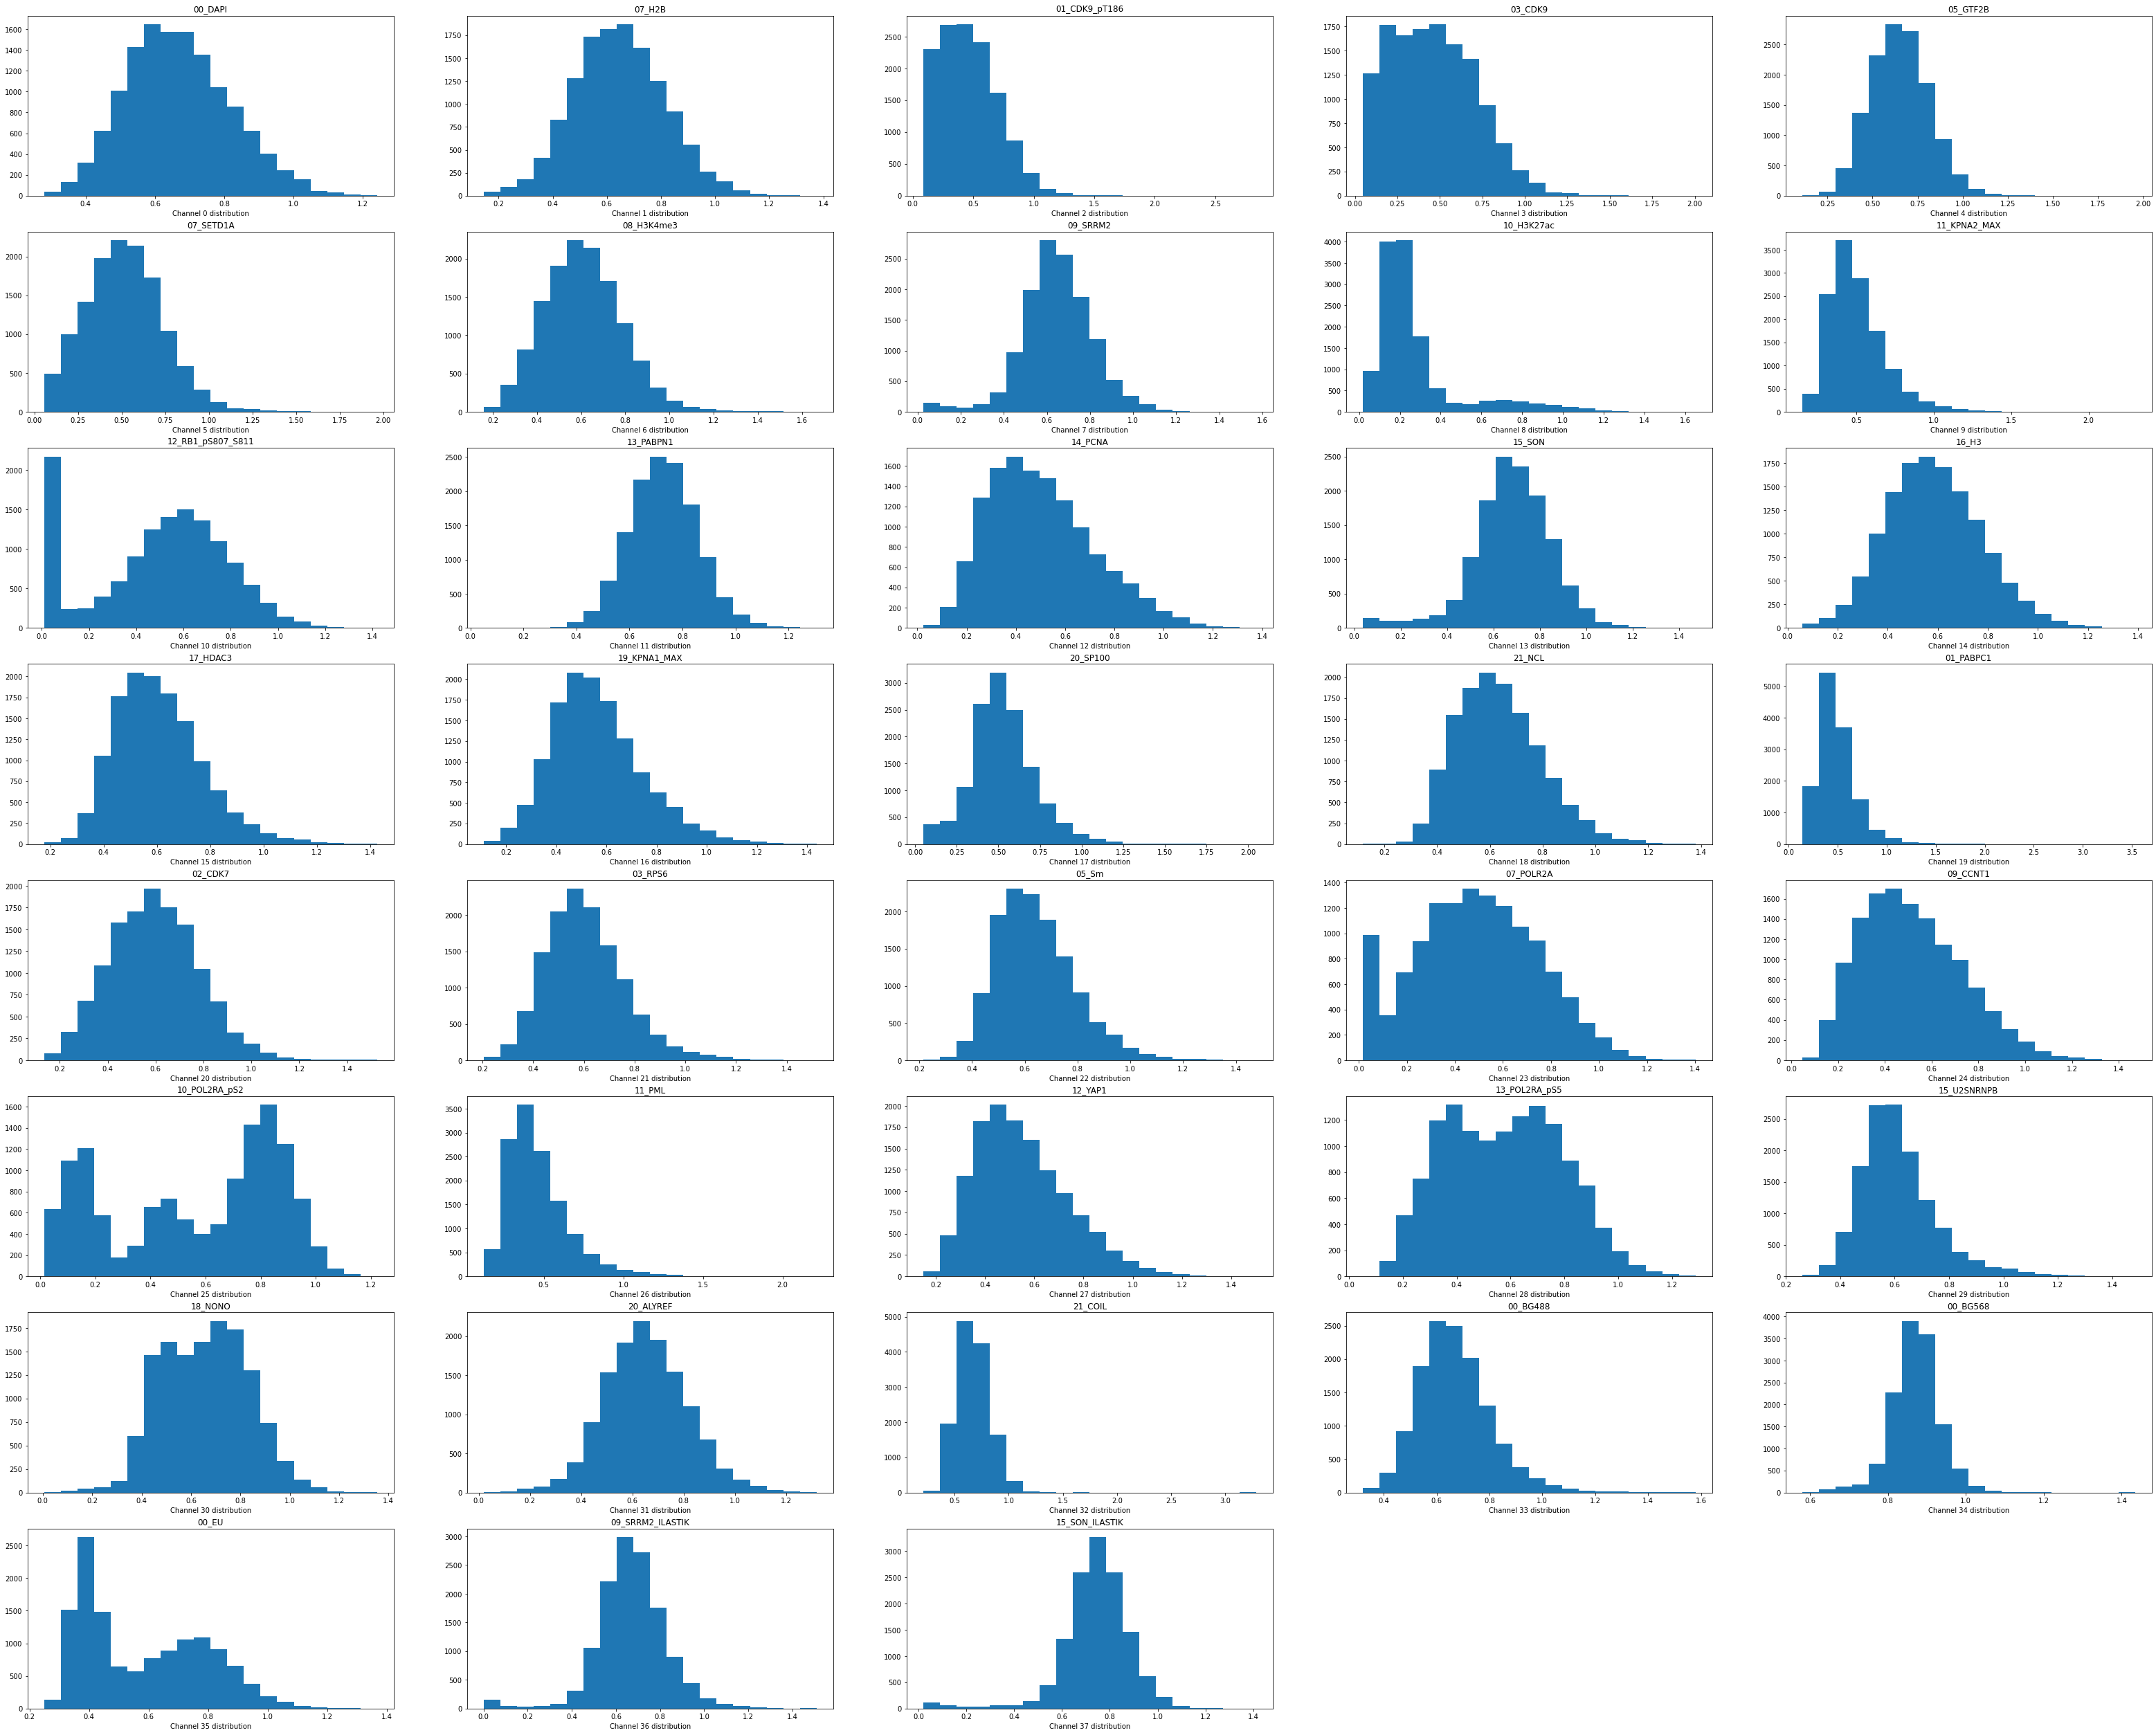

In [7]:
plt.figure(figsize=(55,45))
for c in range(n_chanels):
    plt.subplot(8,5,c+1)
    
    c_name = channels.set_index('channel_id').loc[c].values[1]
    temp = scalar_data[scalar_data.channel == c_name][param['method']]
    plt.hist(temp, bins=20)
    plt.title(c_name)
    plt.xlabel('Channel '+str(c)+' distribution')
    #_ = plt.ylabel('Count')
del(temp)
plt.show()

Now lets see if the distribution per channel also depends on the perturbation: 

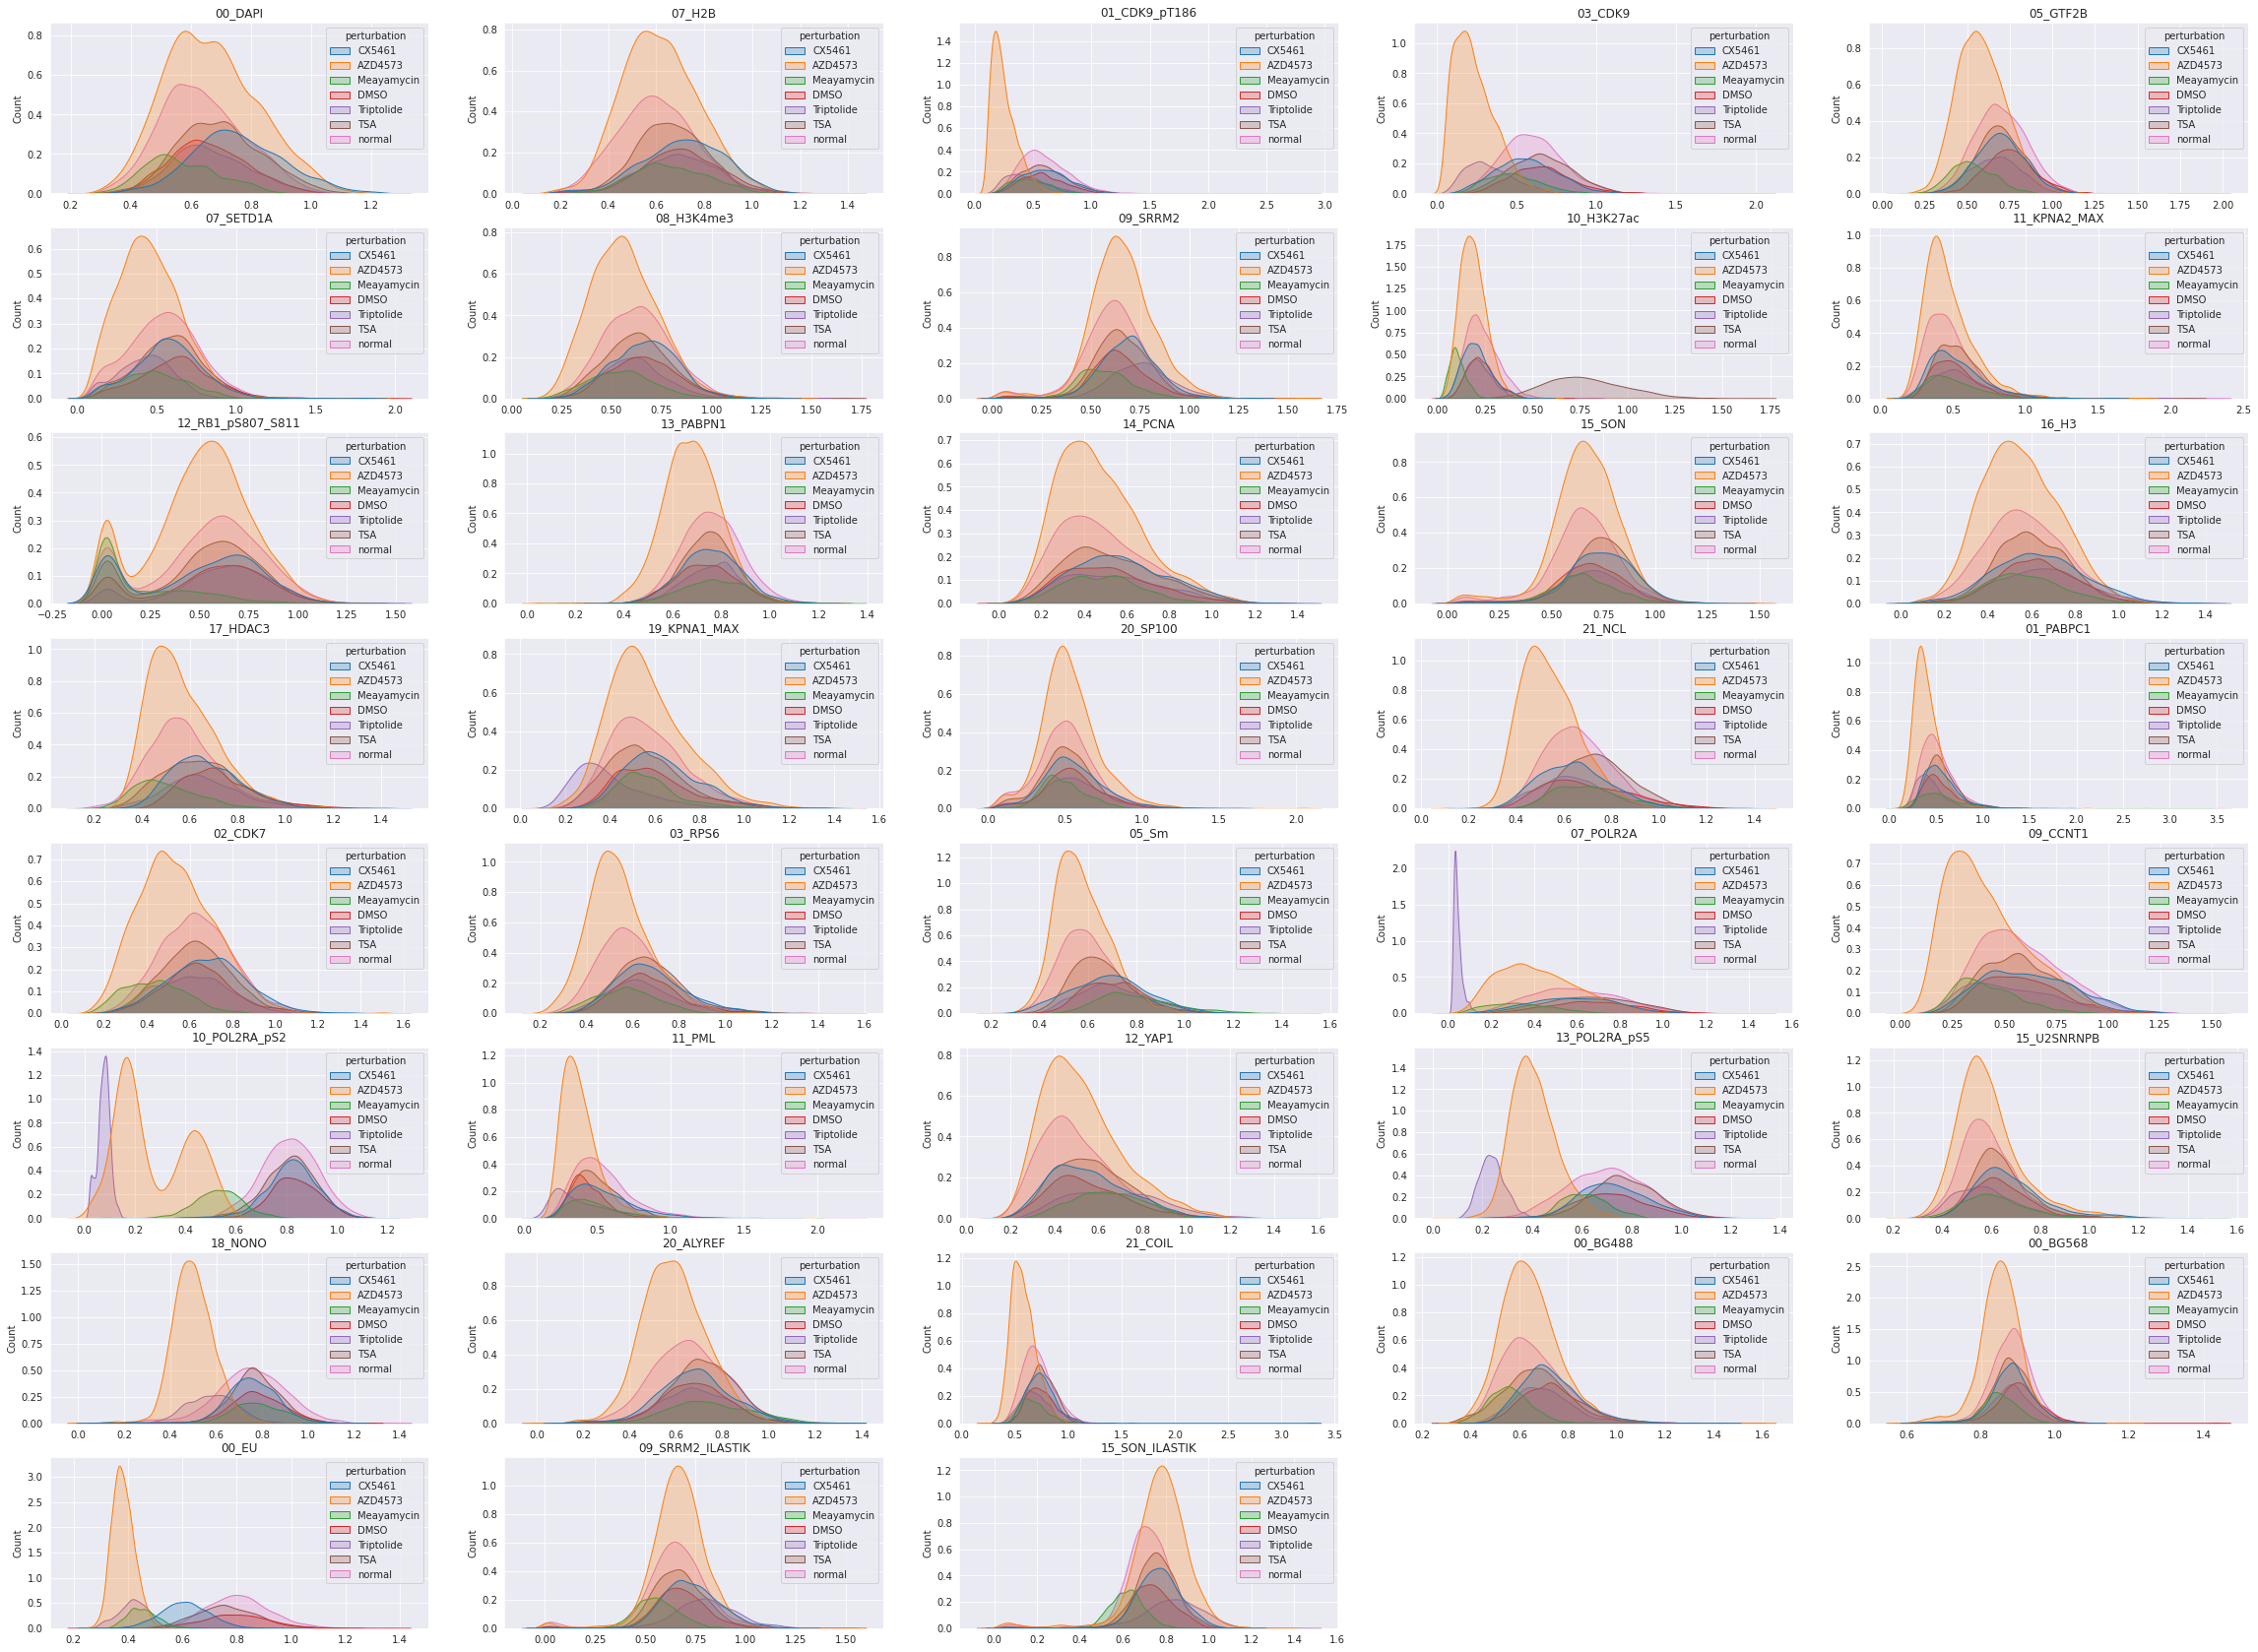

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,30))

for c in range(n_chanels):
    plt.subplot(8,5,c+1)
    c_name = channels.set_index('channel_id').loc[c].values[1]    
    temp = scalar_data[scalar_data.channel == c_name]
    
    sns.kdeplot(x=param['method'], hue='perturbation', data=temp, shade=True, bw_method=0.2)
    plt.title(c_name)
    plt.xlabel('')
    _ = plt.ylabel('Count')

plt.show()

Now lets see if the distribution per channel also depends on the cell cycle: 

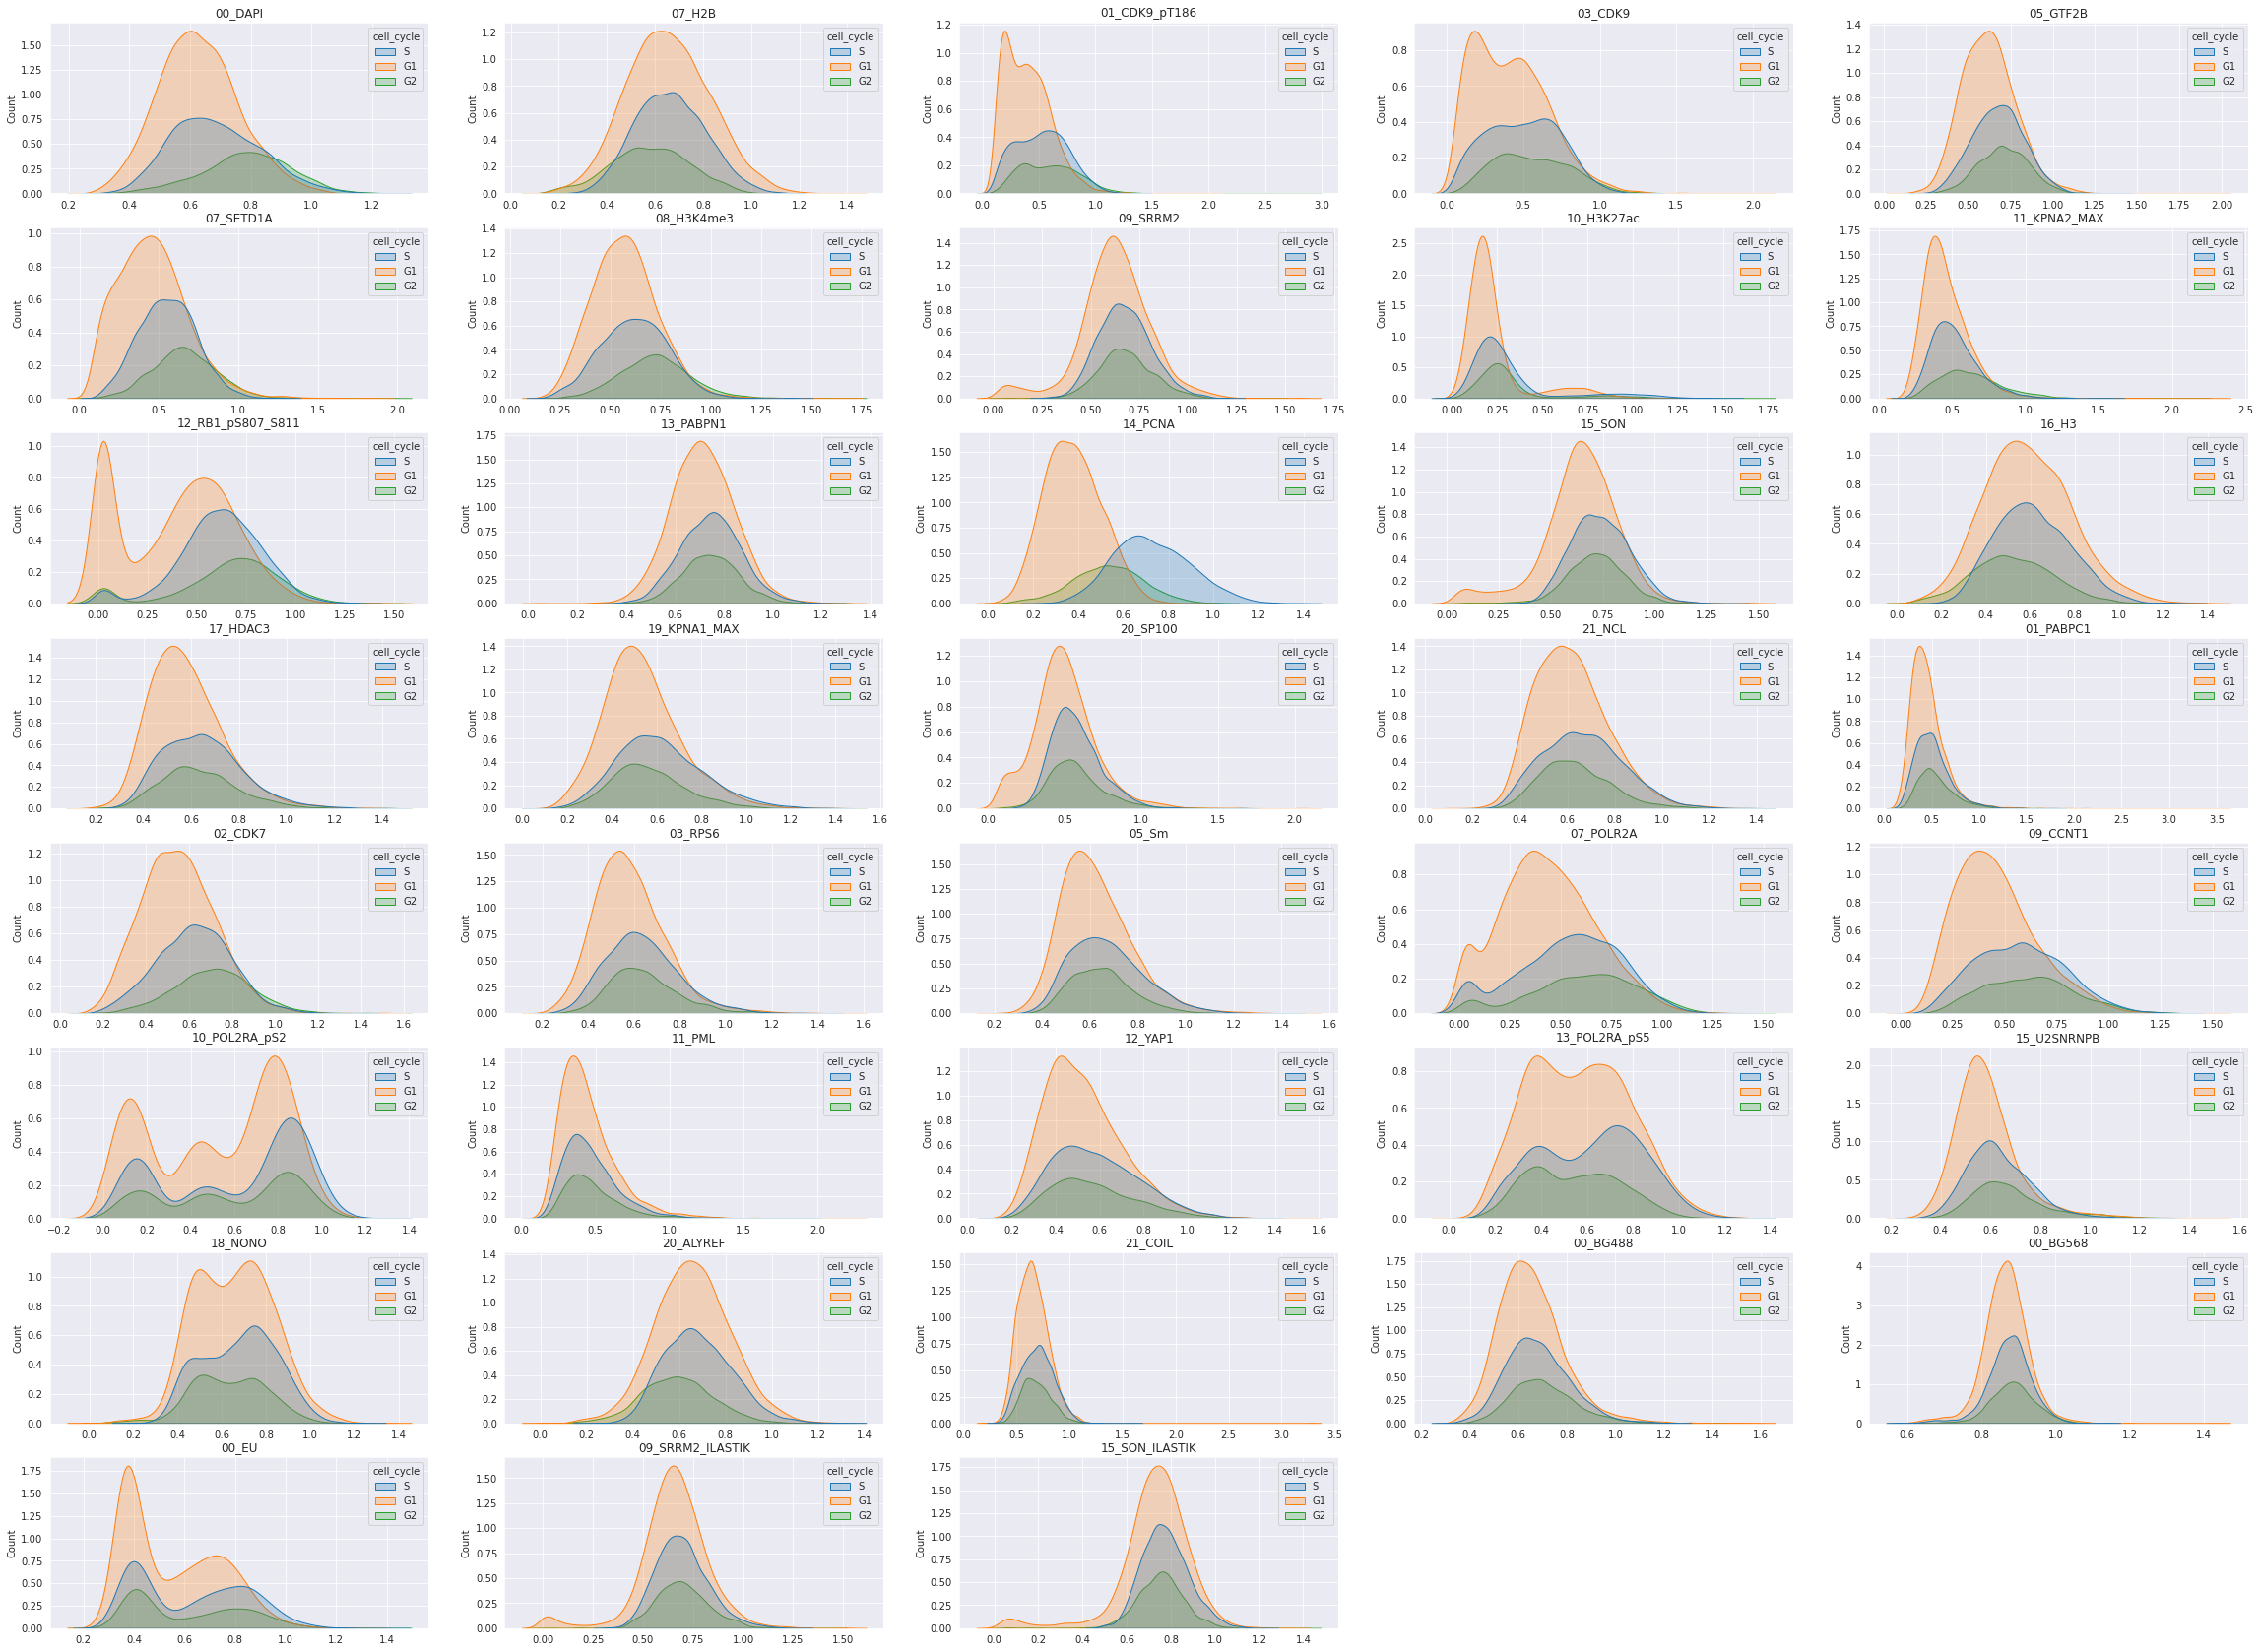

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,30))

for c in range(n_chanels):
    plt.subplot(8,5,c+1)
    c_name = channels.set_index('channel_id').loc[c].values[1]
    
    temp = scalar_data[scalar_data.channel == c_name]
    
    sns.kdeplot(x=param['method'], hue='cell_cycle', data=temp, shade=True, bw_method=0.2)
    plt.title(c_name)
    plt.xlabel('')
    _ = plt.ylabel('Count')

plt.show()